# Homework 4

## _Insert Your Name here_

Please answer all questions in the space provided.



## Question 1: k-Means Clustering (125)


In [1]:
# Add any additional libraries you will use for this assignment in this block
import pandas as pd
from sklearn.datasets import make_moons, make_blobs, make_circles
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import seaborn as sns

### Input Data


,X1,X2
0,-3.757850,-2.046266
1,1.739010,8.962982
2,1.442881,-1.321627
3,10.746604,4.089674
4,-0.847944,9.404339


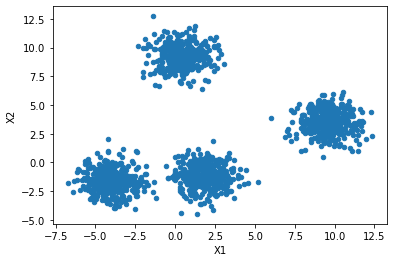

In [2]:
n_samples = 1500
random_state = 299
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=4)
InputData = pd.DataFrame(X, columns=['X1', 'X2'])
InputData.plot(x='X1', y='X2', kind='scatter')
InputData.head()

**Use the data provided in the dataframe `InputData` for question 1.**

<div class="alert alert-block alert-danger">
<b>Question 1(a). </b> Write a function to compute eculidean distance between two points a and b. Note that a and b are tuples lists of the type ('X1','X2'), where 'X1' and 'X2' are the two dimensions as shown in the plot above. <b> (10) </b>
</div>

For example: `EUDist((0,0),(1,2))` should return 1.414

In [3]:
def EUDist(a, b):
    dist = 0
    # Your function here
    dist = ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    return dist


#EUDist((0,0),(1,2))

<div class="alert alert-block alert-danger">
<b>Question 1(b). </b> Write a function to assign a cluster ID to each row in the datframe "DF", given a dictionary of centroids. The dataframe DF must contain columns 'X1' and 'X2'. It may additionally contain any additional columns of your choice. <b> (25) </b>
</div>

The function should return a dataframe newDF that must contain each of 'X1', 'X2' and 'cluserID' columns. An example of the centroids dictionary when k = 4  clusters is: `centroids = {1: (-7,-5), 2: (0,0), 3: (2.5,10), 4: (10,0)}`

In [4]:
def assignClusters(DF, centroids):
    newDF = DF.copy()
    newDF['clusterID'] = np.nan
    # Update the values in the 'clusterID' column based on
    # the nearest centroid using the EUDist function

    ### Your function here
    for j in range(len(newDF)):
        aa = newDF.loc[j, ['X1', 'X2']]
        dist = 9999
        cluID = np.nan
        for i in range(len(centroids)):
            bb = centroids[i + 1]
            cc = EUDist(aa, bb)
            if dist > cc:
                dist = cc
                cluID = i + 1
        newDF.loc[j, 'clusterID'] = cluID

    # Return the dataframe newDF with updated 'clusterID' column.
    return newDF

<div class="alert alert-block alert-danger">
<b>Question 1(c). </b> Write a function to identify centroids given a dataframe "newDF". The dataframe newDF must contain columns 'X1', 'X2' and 'clusterID'. It may additionally contain any additional columns of your choice. <b> (25) </b>
</div>

The function must return a dictionary of centroids of the type: `centroids = {1: (-7,-5), 2: (0,0), 3: (2.5,10), 4: (10,0)}` when k = 4 clusters.

In [5]:
def findCentroids(newDF):
    centroids = {}  # this is a dictionary!
    # The keys in the centroids dictionary are the unique values from newDF['clusterID']
    # The values in the centroids dictionary are tupes of the type ('X1','X2')

    ### Your function here

    for k in range(4):
        cc = newDF[newDF.clusterID == k + 1]
        aa = np.mean(cc)
        centroids[k + 1] = (aa[0], aa[1])
    # Return the updated centroid dictionary
    return centroids

<div class="alert alert-block alert-danger">
<b>Question 1(d). </b> Specify at least three different stopping criterion used in kMeans clustering? <b> (10) </b>
</div>

◦ A fixed number of iterations

◦ partitions unchanged

◦ Cluster centers don't change

<div class="alert alert-block alert-danger">
<b>Question 1(e). </b> Based on the stopping criteria mentioned above, write a function to perform kMeans clustering based on the distance function EUDist() defined in 1(a) and update functions defind in assignClusters() and findCentroid(). <b> (40) </b>
</div>

In [6]:
def kMeans(InputDF, k, initialCentroids):
    # InputDF must contain columns 'X1' and 'X2'
    # the argument k represents the number of clusters
    # initialCentroids is a dictionary similar
    # to the dictionary centroids defined above in 1(b)

    DF = InputData
    DF['clusterID'] = np.nan
    centroids = initialCentroids
    ### Your function here
    for m in range(100):
        numIters = m + 1

        newDF = assignClusters(DF, centroids)
        pp1 = (DF.clusterID == newDF.clusterID).all()
        #print(pp1)
        DF = newDF

        centroids_old = centroids
        centroids = findCentroids(newDF)
        pp2 = centroids == centroids_old
        #print(pp2)

        if (pp1) & (pp2):
            break

    updatedDF = DF
    print('iter:', numIters)
    # return updatedDF that has the columns 'X1', 'X2' and 'clusterID'
    # return number of iterations to compute the kMeans clustering
    return updatedDF, numIters, centroids

<div class="alert alert-block alert-danger">
<b> Question 1(f). </b> Perform kMeans clustering using your function in 1(e) and show the different clusters obtained (using different colors) for the data provided in the dataframe InputData using k = 4 and initialcentroids = {1: (-7,-5), 2: (0,0), 3: (2.5,10), 4: (10,0)}. <b> (5) </b>
</div>



In [7]:
# Uncomment to run
updatedDF, numIters, centroids = kMeans(InputData,
                                        k=4,
                                        initialCentroids={
                                            1: (-7, -5),
                                            2: (0, 0),
                                            3: (2.5, 10),
                                            4: (10, 0)
                                        })

iter: 4


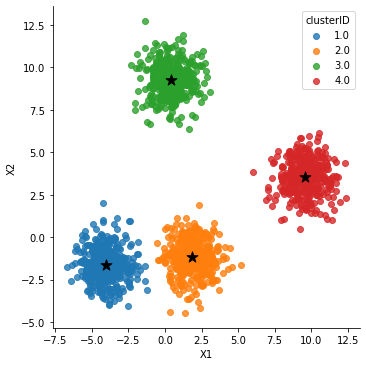

In [8]:
sns.lmplot(x='X1',
           y='X2',
           hue='clusterID',
           data=updatedDF,
           fit_reg=False,
           scatter_kws={'alpha': 0.8},
           legend_out=False)
for i in range(4):
    plt.scatter(centroids[i + 1][0],
                centroids[i + 1][1],
                marker='*',
                color='black',
                s=130)

<div class="alert alert-block alert-danger">
<b> Question 1(g). </b> Repeat 1(f) with randomly chosen initial centroids from your data (i.e., sample four rows without replacement from InputData and use them as initial centroids). Compare the results obtained in 1(f) and 1(g) in terms of the clusters obtained and the number of iterations it took to compute the clusters. <b> (5+5) </b>
</div>

In [9]:
np.random.seed(40)
array_size = (4, 2)
array = np.random.randint(-5, 12, size=array_size)
array = array.tolist()
print("initialCentroids is:")
print(array)

initialCentroids1 = {1: array[0], 2: array[1], 3: array[2], 4: array[3]}

initialCentroids is:
[[1, 2], [0, -4], [7, 2], [5, 4]]


In [10]:
updatedDF, numIters, centroids = kMeans(InputData, k = 4, initialCentroids= initialCentroids1)

iter: 5


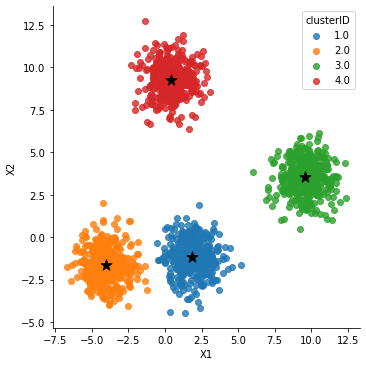

In [11]:
sns.lmplot(x='X1',
           y='X2',
           hue='clusterID',
           data=updatedDF,
           fit_reg=False,
           scatter_kws={'alpha': 0.8},
           legend_out=False)
for i in range(4):
    plt.scatter(centroids[i + 1][0],
                centroids[i + 1][1],
                marker='*',
                color='black',
                s=130)

It shows the importance of Choosing Initial Centroids. Because results can vary drastically based on random seed selection.
Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings

## Question 2: Clustering Methods Comparison (75)

For questions 2(a)-2(e) use the data provided in the variables `Xcircles`, `Xmoons`, `Xbox`, `XFlat`. You will have to make subplots for each of the questions below. You can read more about creating subplots here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html. 
 

In [12]:
Xcircles, _ = make_circles(n_samples=n_samples, factor=.5, noise=.05)

Xmoons, _ = make_moons(n_samples=n_samples, noise=.05)

Xbox, _ = 10 * np.random.rand(n_samples, 2), None

XFlat, y = make_blobs(n_samples=n_samples, random_state=2019, n_features=2)
tf = [[0.5, -0.1], [-0.8, 0.8]]
XFlat = np.dot(X, tf)


<div class="alert alert-block alert-danger">
<b>Question 2(a).</b> Make a scatter plot for the data in `Xcircles`, `Xmoons`, `Xbox`, and `XFlat`. How many clusters do you expect to see for these datasets and why?
 <b> (5+5) </b>
</div>

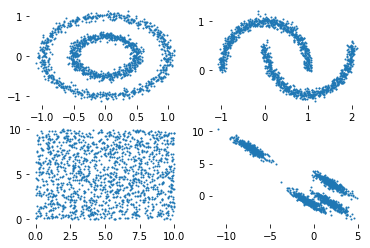

In [13]:
ax1 = plt.subplot(2, 2, 1, frameon=False)
plt.scatter(x=Xcircles[:, 0], y=Xcircles[:, 1], s=1)
ax2 = plt.subplot(2, 2, 2, frameon=False)
plt.scatter(x=Xmoons[:, 0], y=Xmoons[:, 1], s=1)
ax3 = plt.subplot(2, 2, 3, frameon=False)
plt.scatter(x=Xbox[:, 0], y=Xbox[:, 1], s=1)
ax4 = plt.subplot(2, 2, 4, frameon=False)
plt.scatter(x=XFlat[:, 0], y=XFlat[:, 1], s=1)

There should be 2, 2, 1, 4 clusters for each.

<div class="alert alert-block alert-danger">
<b>Question 2(b). </b> Perform DBSCAN clustering using sklearn for `Xcircles`, `Xmoons`, `Xbox`, and `XFlat`. Make a 1x4 scatter plot grid (using subplots) with different datasets in different columns and show the clusters obtained in different colors. Use parameters of your choice.
 <b> (5+5) </b>
</div>


In [14]:
result_6_4 = []

from sklearn.cluster import DBSCAN

#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X1)
labels = pd.DataFrame(dbscan.labels_, columns=['Cluster ID'])
result1 = pd.concat((X1, labels), axis=1)
result_6_4.append(result1)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X2)
labels = pd.DataFrame(dbscan.labels_, columns=['Cluster ID'])
result2 = pd.concat((X2, labels), axis=1)
result_6_4.append(result2)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")

#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X3)
labels = pd.DataFrame(dbscan.labels_, columns=['Cluster ID'])
result3 = pd.concat((X3, labels), axis=1)
result_6_4.append(result3)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
dbscan = DBSCAN(eps=0.3, min_samples=8)
dbscan.fit(X4)
labels = pd.DataFrame(dbscan.labels_, columns=['Cluster ID'])
result4 = pd.concat((X4, labels), axis=1)
result_6_4.append(result4)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for XFlat: {labels.max()[0]+1}")

Number of clusters produced for Xcircles: 2
Number of clusters produced for Xmoons: 2
Number of clusters produced for Xbox: 0
Number of clusters produced for XFlat: 4


<AxesSubplot:xlabel='x', ylabel='y'>

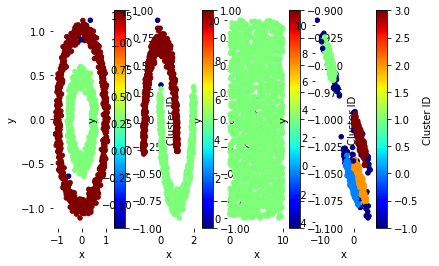

In [15]:
ax1 = plt.subplot(1, 4, 1, frameon=False)
result1.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax1)
#ax1.set_title('DBSCAN Clustering')

ax2 = plt.subplot(1, 4, 2, frameon=False)
result2.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax2)
#ax2.set_title('DBSCAN Clustering')

ax3 = plt.subplot(1, 4, 3, frameon=False)
result3.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax3)
#ax3.set_title('DBSCAN Clustering')

ax4 = plt.subplot(1, 4, 4, frameon=False)
result4.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax4)
#ax4.set_title('DBSCAN Clustering')

<div class="alert alert-block alert-danger">
<b>Question 2(c). </b> Perform kMeans clustering using sklearn for `Xcircles`, `Xmoons`, `Xbox`, and `XFlat`. Make a 1x4 scatter plot grid (using subplots) with different datasets in different columns and show the clusters obtained in different colors. Use parameters of your choice and a k >= 2.
 <b> (5+5) </b>
</div>

**Extra Credit: Use your implementation of kMeans from question 1 by modifying the inputs as necessary. (10)**

In [16]:
from sklearn.cluster import KMeans
#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X1)
labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result1 = pd.concat((X1, labels), axis=1)
result_6_4.append(result1)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X2)
labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result2 = pd.concat((X2, labels), axis=1)
result_6_4.append(result2)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")
#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X3)
labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result3 = pd.concat((X3, labels), axis=1)
result_6_4.append(result3)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
k_means = KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(X4)
labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
result4 = pd.concat((X4, labels), axis=1)
result_6_4.append(result4)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print(f"Number of clusters produced for XFlat: {labels.max()[0]+1}")

Number of clusters produced for Xcircles: 2
Number of clusters produced for Xmoons: 2
Number of clusters produced for Xbox: 2
Number of clusters produced for XFlat: 4


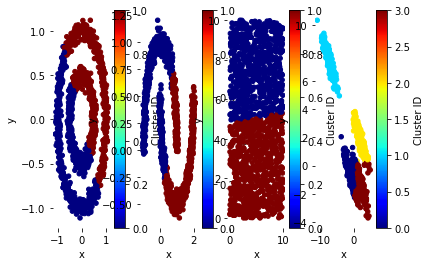

In [17]:
#
ax1 = plt.subplot(1, 4, 1, frameon=False)
result1.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax1)
#ax1.set_title('k_means Clustering')

ax2 = plt.subplot(1, 4, 2, frameon=False)
result2.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax2)
#ax2.set_title('k_means Clustering')

ax3 = plt.subplot(1, 4, 3, frameon=False)
result3.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax3)
#ax3.set_title('k_means Clustering')

ax4 = plt.subplot(1, 4, 4, frameon=False)
result4.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax4)
#ax4.set_title('k_means Clustering')

plt.show()

<div class="alert alert-block alert-danger">
<b>Question 2(d). </b> Perform Agglomerative clustering (Hierarchical) using sklearn for `Xcircles`, `Xmoons`, `Xbox`, and `XFlat`. Compare your results all four different types of linkage algorithms (Ward, complete, average, single), by plotting your results showing different clusters in different colors using subplots (final output should be a 4x4 gird). Use parameters of your choice and a k >= 2. <b> (20) </b>
</div>

You can read more about sklearn's implementation of Hierarchical clustering here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering




In [18]:
from sklearn.cluster import AgglomerativeClustering
#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
agnes_ward.fit(X1)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result11 = pd.concat((X1, labels), axis=1)
result_6_4.append(result11)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
agnes_ward.fit(X2)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result12 = pd.concat((X2, labels), axis=1)
result_6_4.append(result12)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")
#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
agnes_ward.fit(X3)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result13 = pd.concat((X3, labels), axis=1)
result_6_4.append(result13)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
agnes_ward.fit(X4)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result14 = pd.concat((X4, labels), axis=1)
result_6_4.append(result14)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for XFlat: {labels.max()[0]+1}")
#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='complete')
agnes_ward.fit(X1)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result21 = pd.concat((X1, labels), axis=1)
result_6_4.append(result21)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='complete')
agnes_ward.fit(X2)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result22 = pd.concat((X2, labels), axis=1)
result_6_4.append(result22)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")
#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='complete')
agnes_ward.fit(X3)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result23 = pd.concat((X3, labels), axis=1)
result_6_4.append(result23)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=4, linkage='complete')
agnes_ward.fit(X4)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result24 = pd.concat((X4, labels), axis=1)
result_6_4.append(result24)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for XFlat: {labels.max()[0]+1}")
#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='average')
agnes_ward.fit(X1)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result31 = pd.concat((X1, labels), axis=1)
result_6_4.append(result31)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='average')
agnes_ward.fit(X2)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result32 = pd.concat((X2, labels), axis=1)
result_6_4.append(result32)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")
#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='average')
agnes_ward.fit(X3)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result33 = pd.concat((X3, labels), axis=1)
result_6_4.append(result33)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=4, linkage='average')
agnes_ward.fit(X4)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result34 = pd.concat((X4, labels), axis=1)
result_6_4.append(result34)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for XFlat: {labels.max()[0]+1}")
#%
X1 = pd.DataFrame(Xcircles)
X1.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='single')
agnes_ward.fit(X1)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result41 = pd.concat((X1, labels), axis=1)
result_6_4.append(result41)
#result1.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xcircles: {labels.max()[0]+1}")
#%
X2 = pd.DataFrame(Xmoons)
X2.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='single')
agnes_ward.fit(X2)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result42 = pd.concat((X2, labels), axis=1)
result_6_4.append(result42)
#result2.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xmoons: {labels.max()[0]+1}")
#%
X3 = pd.DataFrame(Xbox)
X3.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=2, linkage='single')
agnes_ward.fit(X3)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result43 = pd.concat((X3, labels), axis=1)
result_6_4.append(result43)
#result3.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for Xbox: {labels.max()[0]+1}")
#%
X4 = pd.DataFrame(XFlat)
X4.columns = ['x', 'y']
agnes_ward = AgglomerativeClustering(n_clusters=4, linkage='single')
agnes_ward.fit(X4)
labels = pd.DataFrame(agnes_ward.labels_, columns=['Cluster ID'])
result44 = pd.concat((X4, labels), axis=1)
result_6_4.append(result44)
#result4.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
# print (f"Number of clusters produced for XFlat: {labels.max()[0]+1}")

<AxesSubplot:xlabel='x', ylabel='y'>

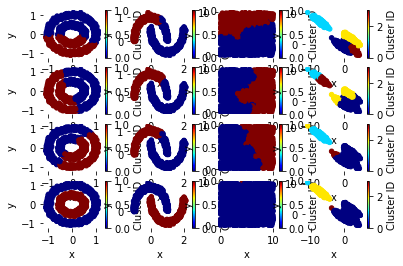

In [19]:
#
ax11 = plt.subplot(4, 4, 1, frameon=False)
result11.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax11)
#ax1.set_title('k_means Clustering')
ax12 = plt.subplot(4, 4, 2, frameon=False)
result12.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax12)
#ax2.set_title('k_means Clustering')
ax13 = plt.subplot(4, 4, 3, frameon=False)
result13.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax13)
#ax3.set_title('k_means Clustering')
ax14 = plt.subplot(4, 4, 4, frameon=False)
result14.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax14)
#ax4.set_title('k_means Clustering')
#
ax21 = plt.subplot(4, 4, 5, frameon=False)
result21.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax21)
#ax1.set_title('k_means Clustering')
ax22 = plt.subplot(4, 4, 6, frameon=False)
result22.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax22)
#ax2.set_title('k_means Clustering')
ax23 = plt.subplot(4, 4, 7, frameon=False)
result23.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax23)
#ax3.set_title('k_means Clustering')
ax24 = plt.subplot(4, 4, 8, frameon=False)
result24.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax24)
#ax4.set_title('k_means Clustering')
#
ax31 = plt.subplot(4, 4, 9, frameon=False)
result31.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax31)
#ax1.set_title('k_means Clustering')
ax32 = plt.subplot(4, 4, 10, frameon=False)
result32.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax32)
#ax2.set_title('k_means Clustering')
ax33 = plt.subplot(4, 4, 11, frameon=False)
result33.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax33)
#ax3.set_title('k_means Clustering')
ax34 = plt.subplot(4, 4, 12, frameon=False)
result34.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax34)
#ax4.set_title('k_means Clustering')
#
ax41 = plt.subplot(4, 4, 13, frameon=False)
result41.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax41)
#ax1.set_title('k_means Clustering')
ax42 = plt.subplot(4, 4, 14, frameon=False)
result42.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax42)
#ax2.set_title('k_means Clustering')
ax43 = plt.subplot(4, 4, 15, frameon=False)
result43.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax43)
#ax3.set_title('k_means Clustering')
ax44 = plt.subplot(4, 4, 16, frameon=False)
result44.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', ax=ax44)
#ax4.set_title('k_means Clustering')

<div class="alert alert-block alert-danger">
<b> Question 2(e). </b> Make a final (single) plot comparing all the clustering results from 2(b)-2(d) . The plot must contain 6 rows one each for DBSCAN, kMeans, and four rows for Agglomerative clusteting (all four linkage algorithms) and 4 columns one each for `Xcircles`, `Xmoons`, `Xbox`, and `XFlat`. Report your observations on the types of clusters obtained using each method.
 <b> (10+5) </b>
</div>

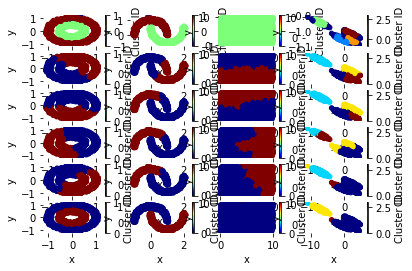

In [20]:
for i in range(24):
    ax_6_4 = plt.subplot(6, 4, i + 1, frameon=False)
    result_6_4[i].plot.scatter(x='x',
                               y='y',
                               c='Cluster ID',
                               colormap='jet',
                               ax=ax_6_4)

<div class="alert alert-block alert-danger">
<b> Question 2(e). </b> Since DBSCAN is sensitive to parameters, suggest two different ways to determine the Parameters $\epsilon$ and $MinPts$.
 <b> (5+5) </b>
</div>

No, picking a randomly choosen $\epsilon$ and MinPts is not the answer. :)

For minPts, one heuristic approach is use ln(n), where n is the total number of points to be clustered. Or choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

For $\epsilon$, there are several ways to determine it:

1) k-distance plot

In a clustering with minPts = k, we expect that core pints and border points' k-distance are within a certain range, while noise points can have much greater k-distance, thus we can observe a knee point in the k-distance plot. However, sometimes there may be no obvious knee, or there can be multiple knees, which makes it hard to decide.

2) DBSCAN extensions like OPTICS

OPTICS produce hierarchical clusters, we can extract significant flat clusters from the hierarchical clusters by visual inspection, OPTICS implementation is available in Python module pyclustering.

<div class="alert alert-block alert-warning">
<b>Feedback:</b> Use the space below to give your feedback about this assignment in terms of the difficulty level and how long it took to complete it, etc. 
</div>